In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('boston.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')

In [3]:
df = df[['MEDV','AGE','LSTAT']]

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc=sc.fit(df)

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model 
import numpy as np
X=df[['AGE','LSTAT']].values
X=np.sqrt(X)
X=sc.fit_transform(X)
y=df['MEDV'].values
X=X.astype(float)
y=y.astype(float)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, 
                                                    random_state=16)

In [6]:

from sklearn import linear_model 

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

34.53805614172797
[  8.50025826 -42.99371508]


In [7]:
import numpy as np
from sklearn import metrics
y_test_pred=model.predict(X_test)
print('Score or R-squared: ',model.score(X_test,y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_test_pred)) 

Score or R-squared:  0.546577058998974
Mean Absolute Error: 4.051716702398854
Mean Squared Error: 30.00757076633363
Root Mean Squared Error: 5.477916644704776
Mean Absolute percentage Error: 0.22086932752123536


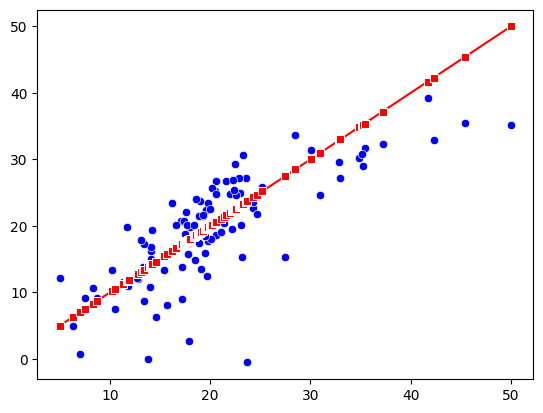

In [8]:
import seaborn  as sns
sns.lineplot(x=y_test.flatten(),y=y_test.flatten(),marker='s',color='r')
sns.scatterplot(x=y_test.flatten(),y=y_test_pred.flatten(),marker='o',color='b')
plt.show()

In [9]:
y_test_pred=model.predict(X_test)
dfTestValidation =pd.DataFrame(list(zip(X_test[:,0],X_test[:,1],
                                        y_test.flatten(),
                                        y_test_pred.flatten())),
                                        columns=['AGE_test','LSTAT_test','y_test','y_test_predicted'])
dfTestValidation['Residual']=dfTestValidation['y_test'] - dfTestValidation['y_test_predicted']
dfTestValidation

,AGE_test,LSTAT_test,y_test,y_test_predicted,Residual
0,1.000000,0.289509,23.3,30.591232,-7.291232
1,0.962662,0.715543,12.8,11.957097,0.842903
2,0.857833,0.858152,6.3,4.934726,1.365274
3,0.662196,0.257879,35.2,29.079737,6.120263
4,0.990319,0.516722,17.1,20.740207,-3.640207
...,...,...,...,...,...
97,0.927942,0.518341,17.7,20.140382,-2.440382
98,0.406943,0.380102,19.3,21.655170,-2.355170
99,0.968864,0.684204,15.4,13.357195,2.042805
100,0.971953,0.528518,18.4,20.076963,-1.676963


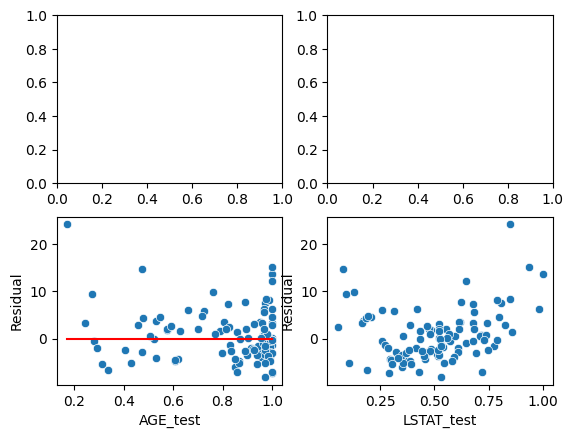

In [10]:
fig,axes=plt.subplots(2,2)
sns.scatterplot(data=dfTestValidation,x='AGE_test',y='Residual',ax=axes[1,0])
sns.lineplot(data=dfTestValidation,x='AGE_test',y=[0]*len(dfTestValidation),color='r',ax=axes[1,0])
sns.scatterplot(data=dfTestValidation,x='LSTAT_test',y='Residual',ax=axes[1,1])
plt.show()

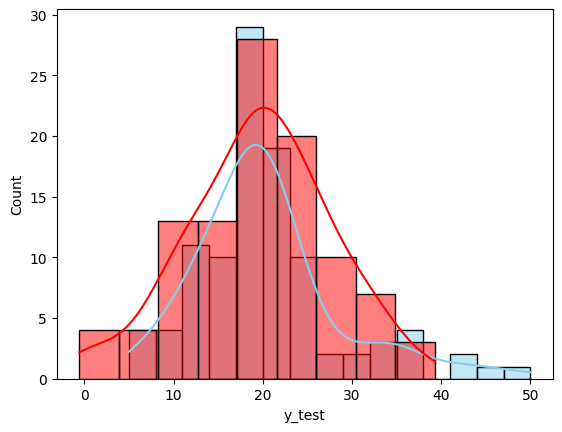

In [11]:
sns.histplot(data=dfTestValidation,x='y_test',color="skyblue",label="Actual",kde=True)
sns.histplot(data=dfTestValidation,x='y_test_predicted',color="red",label="Forecast",kde=True)
plt.show()

In [12]:
import numpy as np
from sklearn import metrics
y_train_pred=model.predict(X_train)
print('Score or R-squared: ',model.score(X_train,y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Mean Absolute percentage Error:', metrics.mean_absolute_percentage_error(y_train, y_train_pred)) 

Score or R-squared:  0.640281023668768
Mean Absolute Error: 4.124793120126675
Mean Squared Error: 31.458228368857394
Root Mean Squared Error: 5.608763532977424
Mean Absolute percentage Error: 0.19363967611734184


In [13]:
y_train_pred=model.predict(X_train)
dfTestValidation =pd.DataFrame(list(zip(X_test[:,0],X_test[:,1],
                                        y_test.flatten(),
                                        y_test_pred.flatten())),
                                        columns=['AGE_train','LSTAT_train','y_train','y_train_predicted'])
dfTestValidation['Residual']=dfTestValidation['y_train'] - dfTestValidation['y_train_predicted']
dfTestValidation

,AGE_train,LSTAT_train,y_train,y_train_predicted,Residual
0,1.000000,0.289509,23.3,30.591232,-7.291232
1,0.962662,0.715543,12.8,11.957097,0.842903
2,0.857833,0.858152,6.3,4.934726,1.365274
3,0.662196,0.257879,35.2,29.079737,6.120263
4,0.990319,0.516722,17.1,20.740207,-3.640207
...,...,...,...,...,...
97,0.927942,0.518341,17.7,20.140382,-2.440382
98,0.406943,0.380102,19.3,21.655170,-2.355170
99,0.968864,0.684204,15.4,13.357195,2.042805
100,0.971953,0.528518,18.4,20.076963,-1.676963


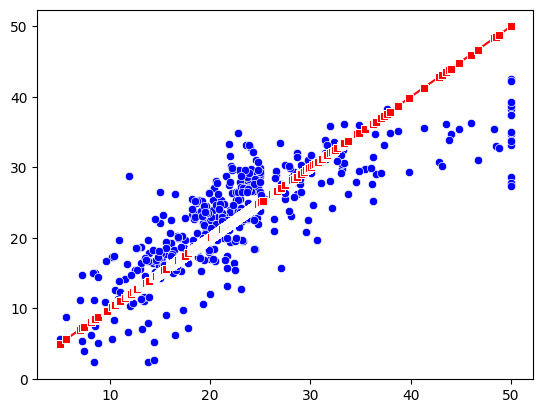

In [14]:
import seaborn  as sns
sns.lineplot(x=y_train.flatten(),y=y_train.flatten(),marker='s',color='r')
sns.scatterplot(x=y_train.flatten(),y=y_train_pred.flatten(),marker='o',color='b')
plt.show()

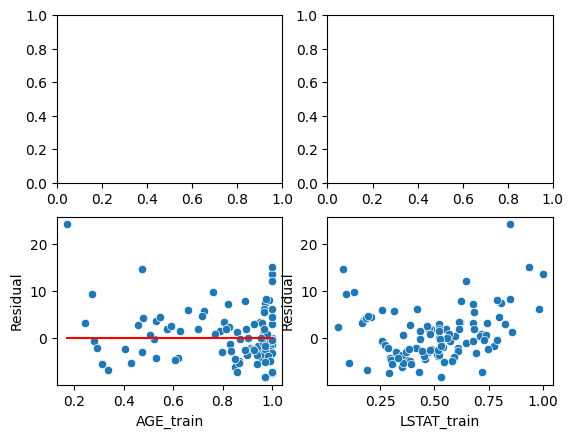

In [15]:
fig,axes=plt.subplots(2,2)
sns.scatterplot(data=dfTestValidation,x='AGE_train',y='Residual',ax=axes[1,0])
sns.lineplot(data=dfTestValidation,x='AGE_train',y=[0]*len(dfTestValidation),color='r',ax=axes[1,0])
sns.scatterplot(data=dfTestValidation,x='LSTAT_train',y='Residual',ax=axes[1,1])
plt.show()

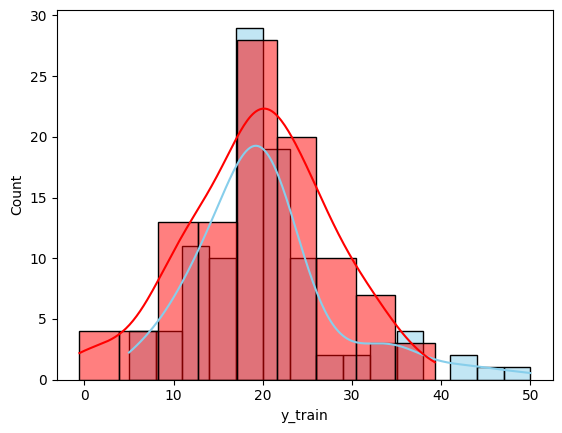

In [16]:
sns.histplot(data=dfTestValidation,x='y_train',color="skyblue",label="Actual",kde=True)
sns.histplot(data=dfTestValidation,x='y_train_predicted',color="red",label="Forecast",kde=True)
plt.show()